In [ ]:
!wget -O face_emotion.zip "https://filesender.renater.fr/download.php?token=1399b9ee-9f53-4f8a-b921-d212325f06a4&files_ids=10167290" facemask


--2021-11-27 23:15:37--  https://filesender.renater.fr/download.php?token=1399b9ee-9f53-4f8a-b921-d212325f06a4&files_ids=10167290
Resolving filesender.renater.fr (filesender.renater.fr)... 194.57.3.10
Connecting to filesender.renater.fr (filesender.renater.fr)|194.57.3.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80330117 (77M) [application/zip]
Saving to: ‘face_emotion.zip’

face_emotion.zip    100%[===================>]  76.61M   621KB/s    in 2m 8s   

2021-11-27 23:17:45 (615 KB/s) - ‘face_emotion.zip’ saved [80330117/80330117]

--2021-11-27 23:17:45--  http://facemask/
Resolving facemask (facemask)... failed: Name or service not known.
wget: unable to resolve host address ‘facemask’
FINISHED --2021-11-27 23:17:45--
Total wall clock time: 2m 9s
Downloaded: 1 files, 77M in 2m 8s (615 KB/s)


In [ ]:
!unzip -q face_emotion.zip -d image_emotion

In [ ]:
picture_size = 48

In [ ]:
import os
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
dataset_Foldre="image_emotion/image_emotion/train"
dataset_Classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]
data = []
labels = []
for folder in dataset_Classes:
    path = os.path.join(dataset_Foldre,folder)
    category_num = dataset_Classes.index(folder)
    for image_name in os.listdir(path):
        image_path = os.path.join(path,image_name)
        image = load_img(image_path, target_size=(picture_size, picture_size),color_mode="grayscale")
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category_num)        

data_train = np.array(data, dtype="float32")
labels_train = np.array(labels)
dataset_Foldre="image_emotion/image_emotion/test"
data = []
labels = []
for folder in dataset_Classes:
    path = os.path.join(dataset_Foldre,folder)
    category_num = dataset_Classes.index(folder)
    for image_name in os.listdir(path):
        image_path = os.path.join(path,image_name)
        image = load_img(image_path, target_size=(picture_size, picture_size),color_mode="grayscale")
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category_num)        

data_test = np.array(data, dtype="float32")
labels_test = np.array(labels)
        

(28709,)


In [ ]:
from keras import models
from keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras import Sequential

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=7,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48


In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 activation_22 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_20 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 activation_23 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_21 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                     

In [ ]:
model.compile(optimizer=Adam(lr=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
"""batch_size = 128
data_size = data_train.shape[0]
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer=Adam(lr=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()"""

In [ ]:
history = model.fit(data_train, labels_train,shuffle=True,
                    validation_data=(data_test, labels_test),
                    epochs=50,
                    batch_size=64,callbacks=callbacks_list)

Epoch 1/50
449/449 [==============================] - 25s 51ms/step - loss: 2.2120 - accuracy: 0.2222 - val_loss: 1.7462 - val_accuracy: 0.3002 - lr: 0.0010
Epoch 2/50
449/449 [==============================] - 22s 49ms/step - loss: 1.6871 - accuracy: 0.3407 - val_loss: 1.4842 - val_accuracy: 0.4216 - lr: 0.0010
Epoch 3/50
449/449 [==============================] - 22s 49ms/step - loss: 1.4918 - accuracy: 0.4240 - val_loss: 1.3497 - val_accuracy: 0.4806 - lr: 0.0010
Epoch 4/50
449/449 [==============================] - 22s 49ms/step - loss: 1.3948 - accuracy: 0.4586 - val_loss: 1.2947 - val_accuracy: 0.4999 - lr: 0.0010
Epoch 5/50
449/449 [==============================] - 22s 49ms/step - loss: 1.3229 - accuracy: 0.4906 - val_loss: 1.2400 - val_accuracy: 0.5258 - lr: 0.0010
Epoch 6/50
449/449 [==============================] - 22s 50ms/step - loss: 1.2628 - accuracy: 0.5189 - val_loss: 1.1827 - val_accuracy: 0.5410 - lr: 0.0010
Epoch 7/50
449/449 [==============================] - 22s 

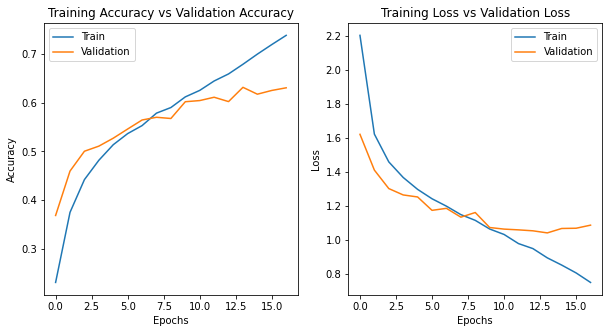

In [ ]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(1,2)
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(10,5)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Train', 'Validation'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Train', 'Validation'], loc='best')

plt.show()

In [ ]:
model.save('emotion_detection.h5')
model.save_weights('model_weight.h5')
np.save("history", history.history)

In [ ]:
type(data_test)

numpy.ndarray

In [ ]:
print(model.predict(data_test))

[[1.0143765e-01 1.5129494e-02 3.0549222e-01 ... 1.5269163e-01
  3.9611158e-01 1.4847889e-02]
 [5.1316220e-01 4.0192034e-02 2.0019159e-01 ... 7.1972989e-02
  1.5761690e-01 1.0848062e-02]
 [2.4279331e-01 9.9426433e-03 1.4352179e-01 ... 1.4795856e-01
  4.3299019e-01 2.6213187e-03]
 ...
 [4.2184070e-04 8.0855880e-06 7.9735974e-03 ... 2.0745516e-04
  3.1817406e-05 9.9096805e-01]
 [2.3858892e-03 1.4280788e-04 3.1201199e-03 ... 5.8555277e-04
  4.6410554e-04 2.9694760e-02]
 [1.7052591e-03 9.5425436e-05 6.1158877e-02 ... 1.0810067e-03
  5.2494032e-04 9.3464518e-01]]


In [ ]:
from tensorflow.keras.models import load_model
model2= load_model("emotion_detection.h5")
model2.load_weights("model_weight.h5")

In [ ]:
print(model2.predict(data_test))

[[2.38914117e-01 7.92911742e-03 1.96438566e-01 ... 2.48700008e-01
  2.69697338e-01 2.87960004e-02]
 [7.27850914e-01 3.18522677e-02 6.74384162e-02 ... 3.91881950e-02
  1.19564682e-01 2.10044067e-03]
 [3.67521763e-01 2.58150212e-02 8.94349366e-02 ... 1.35387510e-01
  3.60365659e-01 1.81477761e-03]
 ...
 [2.76475421e-05 7.71467569e-07 1.76561798e-03 ... 4.65808298e-05
  3.35368190e-06 9.98038232e-01]
 [6.32866565e-03 5.55694161e-04 1.85480230e-02 ... 1.00292580e-03
  1.31173711e-03 1.01330787e-01]
 [5.37577434e-04 1.08046015e-05 1.03356075e-02 ... 9.73076530e-05
  1.86240613e-05 9.88698304e-01]]
